In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import analysis_util
from matplotlib import gridspec
from inspect_util import Chunk
from inspect_util import remove_empty_lines
from inspect_util import normalize_lines

In [14]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [15]:
df_po = pd.read_csv('data/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [16]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [17]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [18]:
# remove implicit forks
df = analysis_util.filter_implicit_forks(df)
print(f'New total number of chunks: {len(df)}')

Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'IceColdSandwich/android_frameworks_base', 'adetaylor/android-frameworks-base-with-remote-control-service', 'AOKP/frameworks_base_disabled', 'allwinner-ics/platform_frameworks_base', 'cgjones/android-frameworks-base', 'RealVNC/android-frameworks-base-with-screenshot-tweaks'}
Total valid projects:  1076
New total number of chunks: 10177


In [19]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.017700e+04,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000
mean,1.097355e+06,0.55345,0.533306,0.510045,0.489930,0.086609,1.823622,2.175789,32.502489,36.404496,6.79493,6.965216,0.170286,15.298418,8.516164
std,2.119343e+05,0.31901,0.320762,0.304105,0.304072,0.198059,6.835704,10.463504,29.994432,30.863874,30.51060,33.251309,20.674248,68.754593,36.407157
min,7.766620e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-388.000000,2.000000,1.000000
25%,9.398230e+05,0.33000,0.330000,0.330000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-2.000000,4.000000,2.000000
50%,1.064856e+06,0.50000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.00000,3.000000,0.000000,6.000000,3.000000
75%,1.258354e+06,0.81000,0.800000,0.700000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.00000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.00000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.00000,1402.000000,1401.000000,2922.000000,1557.000000


In [20]:
# chunks where the normalized percentage don't add to 1
for index, row in df.iterrows():
    v1 = row['normalized_v1_percentage']
    v2 = row['normalized_v2_percentage']
    if v1 + v2 != 1:
        print(row['chunk_id'], v1, v2)

947182 0.78 0.23
964098 0.0 0.9
988476 0.42 0.57
1045733 0.57 0.42
1091475 0.0 0.99
1108391 0.05 0.84
1115864 0.68 0.33
1144705 0.82 0.17
1273096 0.68 0.33
1392141 0.57 0.42
1421052 0.42 0.57
1465800 0.26 0.73


In [21]:
df[df['normalized_v1_percentage'] <= 0.1]

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
14,777042,0.00,1.00,0.00,1.00,0.00,v2,0,4,0.0,57.14,0,7,7.0,True,7,3
19,777238,0.00,1.00,0.00,1.00,0.00,v2,1,1,100.0,50.00,1,2,1.0,True,3,1
26,777309,0.00,1.00,0.00,1.00,0.00,v2,0,2,0.0,9.52,0,21,21.0,True,21,19
28,777313,0.09,0.91,0.09,0.91,0.00,v1 v2,3,0,75.0,0.00,4,10,6.0,True,14,11
29,777316,0.00,1.00,0.00,1.00,0.00,v2,1,2,100.0,66.67,1,3,2.0,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13419,1611177,0.00,1.00,0.00,1.00,0.00,v2,2,10,100.0,83.33,2,12,10.0,True,18,3
13420,1610286,0.07,0.96,0.06,0.94,0.04,(v1_2) v1 v2,0,6,0.0,18.75,2,32,30.0,True,35,28
13421,1610290,0.07,0.96,0.06,0.94,0.04,(v1_2) v1 v2,0,6,0.0,18.75,2,32,30.0,True,35,28
13425,1610445,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.0,50.00,0,2,2.0,True,2,1


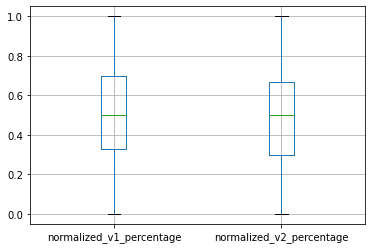

In [22]:
df.boxplot(column=['normalized_v1_percentage', 'normalized_v2_percentage'], showfliers=False)
plt.show()

In [23]:
print(len(df[df['normalized_v1_percentage'] <= 0.1]))
print(len(df[df['normalized_v2_percentage'] >= 0.9]))

1418
1417


[[12.842684484622188, 0.05], [13.933379188365924, 0.1], [16.045986046968654, 0.15], [18.40424486587403, 0.2], [21.912154858995773, 0.25], [23.16989289574531, 0.3], [29.576496020438242, 0.35], [32.13127640758574, 0.4], [33.772231502407394, 0.45], [62.55281517146507, 0.5], [63.55507516949985, 0.55], [65.99194261570207, 0.6], [67.66237594576005, 0.65], [75.05158691166356, 0.7], [79.4241918050506, 0.75], [81.42871180112017, 0.8], [82.81418885722708, 0.85], [84.9071435590056, 0.9], [86.05679473322198, 0.95], [100.0, 1.0]]

[[14.10042252137172, 0.05], [15.4367691854181, 0.1], [17.27424584848187, 0.15], [19.87815662768989, 0.2], [24.0149356391864, 0.25], [25.341456224820675, 0.3], [32.445710916773116, 0.35], [35.04962169598113, 0.4], [36.720055026039105, 0.45], [65.72663849857521, 0.5], [66.47342045789524, 0.55], [68.9299400609217, 0.6], [70.60037339097967, 0.65], [77.26245455438733, 0.7], [80.93740788051488, 0.75], [82.73558022993024, 0.8], [84.0621008155645, 0.85], [86.37122924240936, 0.9],

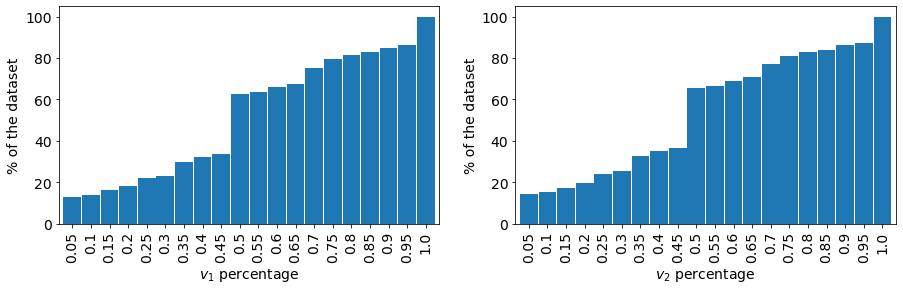

In [24]:
data_v1 = []

for v1_percentage in range(5, 101, 5):
    v1_percentage /= 100
    chunks = df[df['normalized_v1_percentage'] <= v1_percentage]
    percentage = (len(chunks)/len(df)) * 100
    data_v1.append([percentage, v1_percentage])
    
data_v2 = []

for v2_percentage in range(5, 101, 5):
    v2_percentage /= 100
    chunks = df[df['normalized_v2_percentage'] <= v2_percentage]
    percentage = (len(chunks)/len(df)) * 100
    data_v2.append([percentage, v2_percentage])
print(data_v1)
print()
print(data_v2)
df_plot = pd.DataFrame(data_v1, columns=['%', 'v1_percentage'])
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
df_plot.plot(kind='bar', x='v1_percentage', width=0.95, legend=False, ax=ax[0])
ax[0].set_ylabel("% of the dataset", fontsize=14)
ax[0].set_xlabel("$v_{1}$ percentage", fontsize=14)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].tick_params(axis="y", labelsize=14)

df_plot2 = pd.DataFrame(data_v2, columns=['%', 'v2_percentage'])
df_plot2.plot(kind='bar', x='v2_percentage', width=0.95, legend=False, ax=ax[1])
ax[1].set_ylabel("% of the dataset", fontsize=14)
ax[1].set_xlabel("$v_{2}$ percentage", fontsize=14)
ax[1].tick_params(axis="x", labelsize=14)
ax[1].tick_params(axis="y", labelsize=14)
plt.show()

In [25]:
df_plot

,%,v1_percentage
0,12.842684,0.05
1,13.933379,0.10
2,16.045986,0.15
3,18.404245,0.20
4,21.912155,0.25
5,23.169893,0.30
6,29.576496,0.35
7,32.131276,0.40
8,33.772232,0.45
9,62.552815,0.50


In [26]:
len(df)

10177

In [27]:
df[df['normalized_v1_percentage'] + df['normalized_v2_percentage'] != 1]

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
3507,947182,1.00,0.45,0.78,0.23,0.45,v1 (v1_2) v1 (v1_2) v1 v2 v1 (v1_2) v1 (v1_2) v1,1,8,5.00,47.06,20,17,-3.0,True,37,20
3860,964098,0.00,0.90,0.00,0.90,0.00,v2,0,17,0.00,65.38,0,26,26.0,False,30,12
4848,988476,0.70,0.85,0.42,0.57,0.55,v1 (v1_2) v2 (v1_2) v1 (v1_2) v1 v2 (v1_2) v2...,5,5,26.32,22.73,19,22,3.0,True,48,24
5982,1045733,0.70,0.55,0.57,0.42,0.25,v2 v1 (v1_2) v1 v2 v1 (v1_2) v2 v1 (v1_2) v2 ...,0,9,0.00,45.00,14,20,6.0,True,42,24
7080,1091475,0.01,1.00,0.00,0.99,0.01,v2 (v1_2) v2,0,689,0.00,49.14,1,1402,1401.0,False,1596,810
7510,1108391,0.11,0.89,0.05,0.84,0.11,v2 (v1_2) v1 v2,1,20,33.33,37.74,3,53,50.0,False,75,48
7866,1115864,0.85,0.50,0.68,0.33,0.35,v1 (v1_2) v1 (v1_2) v1 v2 v1,0,0,0.00,0.00,16,5,-11.0,True,26,25
8519,1144705,0.95,0.30,0.82,0.17,0.25,(v1_2) v1 (v1_2) v2 v1,1,0,5.00,0.00,20,4,-16.0,True,28,23
9942,1273096,1.00,0.65,0.68,0.33,0.65,(v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2...,1,1,5.00,8.33,20,12,-8.0,True,32,20
11451,1392141,0.70,0.55,0.57,0.42,0.25,v2 v1 (v1_2) v1 v2 v1 (v1_2) v2 v1 (v1_2) v2 ...,0,9,0.00,45.00,14,20,6.0,True,42,24


In [28]:
first = set(list(df[df['normalized_v1_percentage'] < 0.1]['chunk_id']))
second = set(list(df[(df['normalized_v2_percentage'] > 0.9) & (df['normalized_v2_percentage'] <= 1)]['chunk_id']))
print(len(first))
print(len(second))
print(first - second)
df[df['chunk_id'] == 1108391]

1389
1387
{964098, 1108391}


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
7510,1108391,0.11,0.89,0.05,0.84,0.11,v2 (v1_2) v1 v2,1,20,33.33,37.74,3,53,50.0,False,75,48


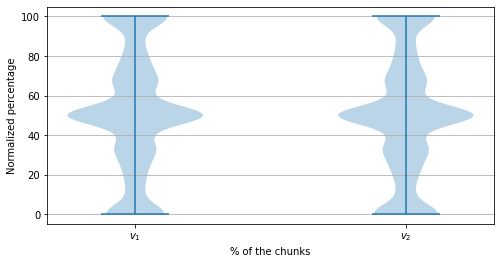

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
v1_perc_data = []
v2_perc_data = []
for value in df['normalized_v1_percentage'].values:
    v1_perc_data.append(value*100)
for value in df['normalized_v2_percentage'].values:
    v2_perc_data.append(value*100)
ax.violinplot(dataset = [v1_perc_data,
                         v2_perc_data])
ax.yaxis.grid(True)
ax.set_ylabel('Normalized percentage')
ax.set_xlabel('% of the chunks')
ax.set_xticks([1,2])
ax.set_xticklabels(["$v_{1}$","$v_{2}$"])

plt.show()

In [30]:
import importlib
importlib.reload(analysis_util)
v1_bars, v2_bars = analysis_util.get_normalized_composition_percentage_data(df)

In [31]:
v1_bars

[[1389, '[0%, 10%)'],
 [368, '[10%, 20%)'],
 [557, '[20%, 30%)'],
 [848, '[30%, 40%)'],
 [326, '[40%, 50%)'],
 [2878, '50%'],
 [350, '(50%, 60%]'],
 [922, '(60%, 70%]'],
 [649, '(70%, 80%]'],
 [354, '(80%, 90%]'],
 [1536, '(90%, 100%]']]

In [32]:
v2_bars

[[1536, '[0%, 10%)'],
 [354, '[10%, 20%)'],
 [649, '[20%, 30%)'],
 [922, '[30%, 40%)'],
 [350, '[40%, 50%)'],
 [2878, '50%'],
 [326, '(50%, 60%]'],
 [848, '(60%, 70%]'],
 [557, '(70%, 80%]'],
 [370, '(80%, 90%]'],
 [1387, '(90%, 100%]']]

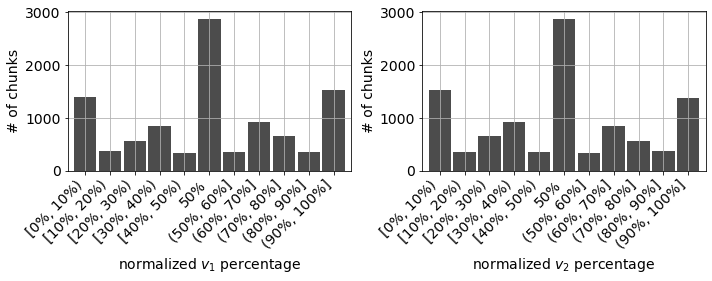

In [33]:
df_plot_v1 = pd.DataFrame(v1_bars, columns=['Chunks', 'Interval'])
df_plot_v2 = pd.DataFrame(v2_bars, columns=['Chunks', 'Interval'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_plot_v1.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax[0], align='center', alpha=0.7, legend=False, color='k', zorder=1)
df_plot_v2.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax[1], align='center', alpha=0.7, legend=False, color='k', zorder=1)
ax[0].set_xlabel("normalized $v_{1}$ percentage", fontsize=14)
ax[0].set_ylabel("# of chunks", fontsize=14)
ax[1].set_xlabel("normalized $v_{2}$ percentage", fontsize=14)
ax[1].set_ylabel("# of chunks", fontsize=14)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].tick_params(axis="y", labelsize=14)
ax[1].tick_params(axis="x", labelsize=14)
ax[1].tick_params(axis="y", labelsize=14)
ax[0].grid(zorder=-1)
ax[1].grid(zorder=-1)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
fig.tight_layout()
plt.show()
fig.savefig('figures/composition_percentage.png', dpi=300, bbox_inches = "tight")


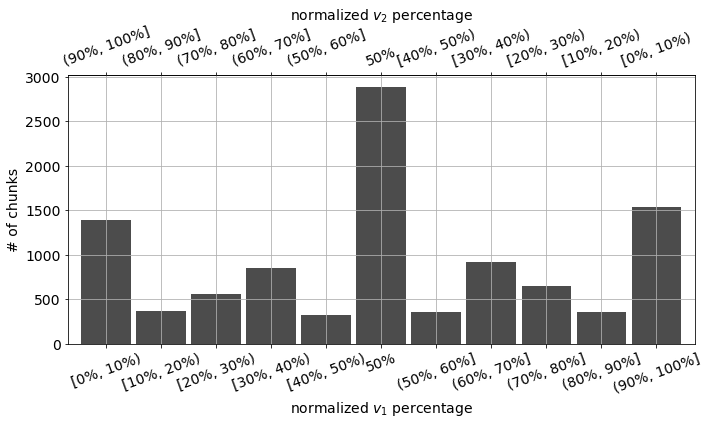

In [35]:
df_plot_v1 = pd.DataFrame(v1_bars, columns=['Chunks', 'Interval'])
df_plot_v2 = pd.DataFrame(v2_bars, columns=['Chunks', 'Interval'])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df_plot_v1.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax, align='center', alpha=0.7, legend=False, color='k', zorder=1)
# df_plot_v2.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax[1], align='center', alpha=0.7, legend=False, color='k', zorder=1)
ax.set_xlabel("normalized $v_{1}$ percentage", fontsize=14)
ax.set_ylabel("# of chunks", fontsize=14)
labels = list(df_plot_v2['Interval'])
# print(list(df_plot_v2['Interval']))
labels = labels[::-1]
top_ax = ax.secondary_xaxis('top')
ticks = [0,1,2,3,4,5,6,7,8,9,10]
top_ax.set_xticks(ticks)
# labels = ['100%', '90%', '80%', '70%', '60%', '50%', '40%', '30%', '20%', '10%', '0%']
top_ax.set_xticklabels(labels, rotation=20, ha='center')
top_ax.tick_params(axis="x", labelsize=14)
top_ax.set_xlabel("normalized $v_{2}$ percentage", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
labels = labels[::-1]
ax.set_xticklabels(labels,rotation=20, ha='center')
fig.tight_layout()
plt.show()
fig.savefig('figures/composition_percentage.png', dpi=300, bbox_inches = "tight")

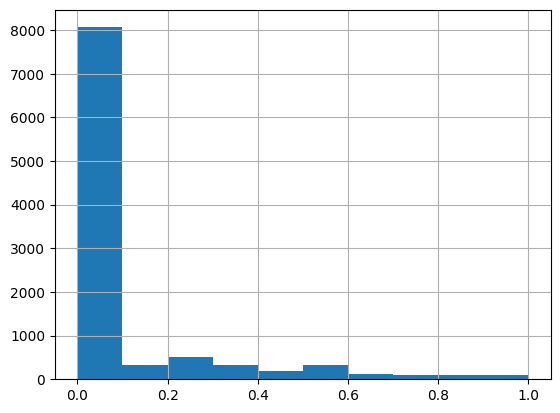

In [11]:
df['intersection_percentage'].hist()
plt.show()

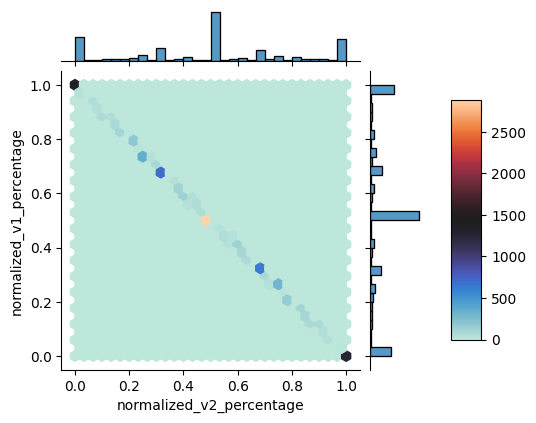

In [12]:
x = df['normalized_v2_percentage']
y = df['normalized_v1_percentage']

p1 = sns.jointplot(x=x, y=y, kind='hex', cmap='icefire')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible

cbar_ax = p1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

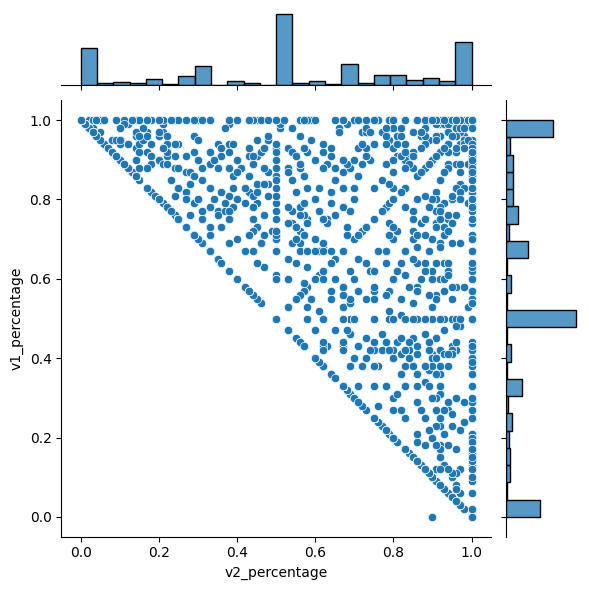

In [13]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='scatter', cmap='BuPu')
plt.show()

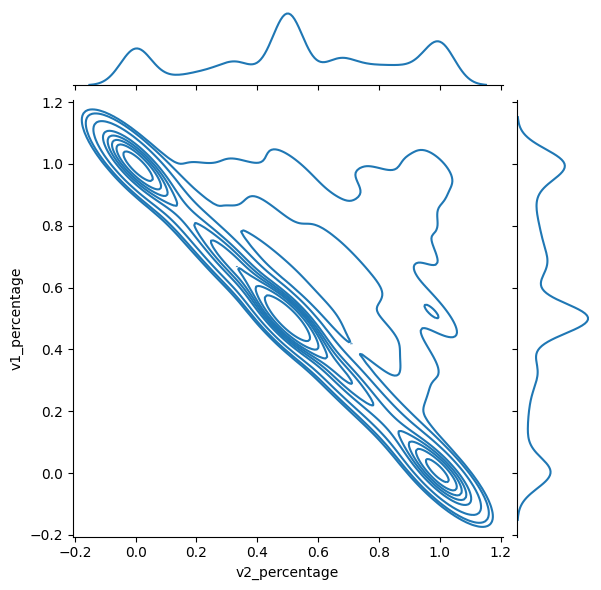

In [14]:
# https://en.wikipedia.org/wiki/Kernel_density_estimation
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

In [15]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)
v1v2v1 = analysis_util.get_chunk_composition_pattern_data('v1 v2 v1', df)
v2v1v2 = analysis_util.get_chunk_composition_pattern_data('v2 v1 v2', df)
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(df)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(df)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(df)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(df)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(df)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(df) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(df)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(df)*100):.2f}%)')



Only v1 lines: 1367 (13.43%)
Only v2 lines: 1260 (12.38%)
No alternation (v1v2): 2677 (26.30%)
No alternation (v2v1): 2093 (20.57%)
Some alternation (v1v2v1 or v2v1v2): 484 (4.76%)
-------------
Easier cases (all above): 7881 (77.44%)
Remaining (harder cases): 2296 (22.56%)


In [16]:
patterns = ['v1', 'v2', 'v1 v2', 'v2 v1', 'v1 v2 v1', 'v2 v1 v2']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
analysis_util.get_chunk_composition_boxplot(df, patterns, 'chunk_size', 'Chunk size', ax[0])
analysis_util.get_chunk_composition_boxplot(df, patterns, 'resolution_size', 'Resolution size', ax[1])
ax[0].set_title('Chunk size')
ax[1].set_title('Resolution size')
fig.tight_layout()
plt.show()


In [17]:
df['chunk_size_delta'].hist()
plt.show()

<AxesSubplot:title={'center':'Resolution size'}, xlabel='Resolution pattern', ylabel='Resolution size'>

## Distribuição dos tipos de resolução em relação à diferença de tamanho entre v1 e v2

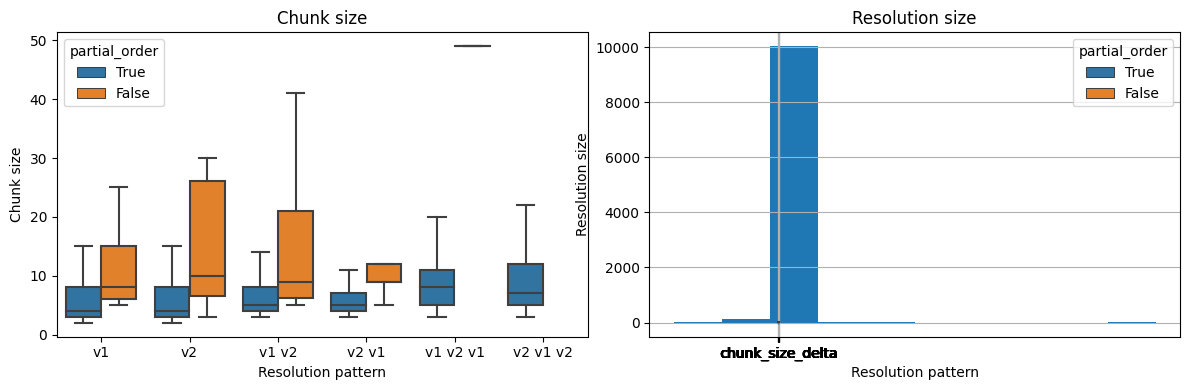

In [18]:
df.boxplot(column=['chunk_size_delta'], showfliers=False)
plt.show()

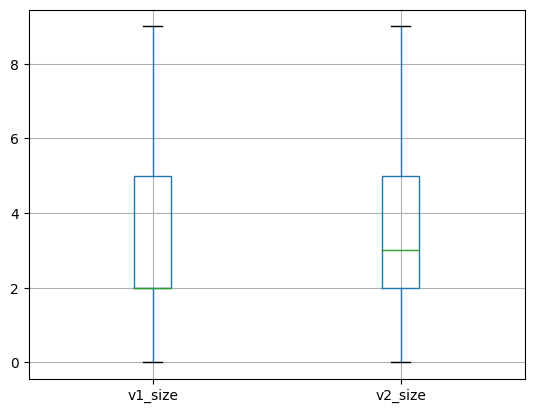

In [19]:
df.boxplot(column=['v1_size', 'v2_size'], showfliers=False)
plt.show()

In [20]:
import importlib
importlib.reload(analysis_util)
df_plot = analysis_util.get_strategies_plot_df(df, v1_only, v2_only, v1v2, v2v1, 'chunk_size_delta')
# display(df_plot.tail())

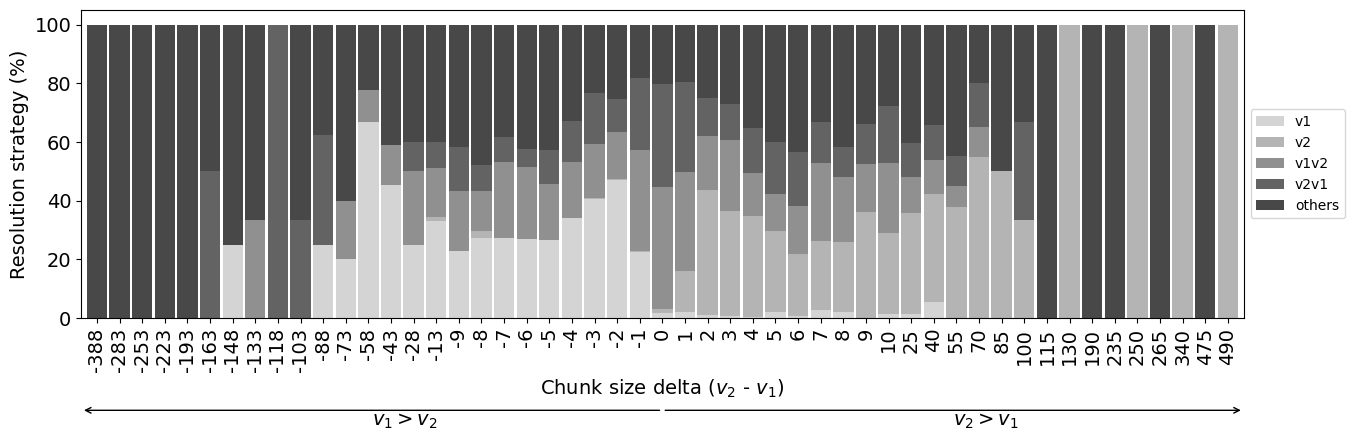

In [21]:
plt.style.use('tableau-colorblind10')
# colors=['black','whitesmoke', 'darkgray','dimgray','lightgray']
colors = ['#D4D4D4', '#B4B4B4', '#909090', '#636363', '#494848']
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', width=0.9, stacked=True, ax = ax, color=colors)
ax.set_ylabel("Resolution strategy (%)", fontsize=14)
ax.set_xlabel("Chunk size delta ($v_{2}$ - $v_{1}$)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.annotate('', xy=(0, -0.3), xycoords='axes fraction', xytext=(0.5,-0.3), 
            arrowprops=dict(arrowstyle="->"))
ax.annotate('$v_1 > v_2$', xy=(0, -0.35), xycoords='axes fraction', xytext=(0.25,-0.35), fontsize=14)

ax.annotate('', xy=(0.5, -0.3), xycoords='axes fraction', xytext=(1,-0.3), 
            arrowprops=dict(arrowstyle="<-"))
ax.annotate('$v_2 > v_1$', xy=(0, -0.35), xycoords='axes fraction', xytext=(0.75,-0.35), fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
# fig.savefig('figures/resolution_composition.png', dpi=300, bbox_inches = "tight")

In [87]:
import importlib
importlib.reload(analysis_util)
df_plot = analysis_util.get_strategies_plot_df2(df, v1_only, v2_only, v1v2, v2v1, 'chunk_size_delta')
df_percentages = analysis_util.get_strategies_plot_bins_percentages(df, v1_only, v2_only, v1v2, v2v1, 'chunk_size_delta')

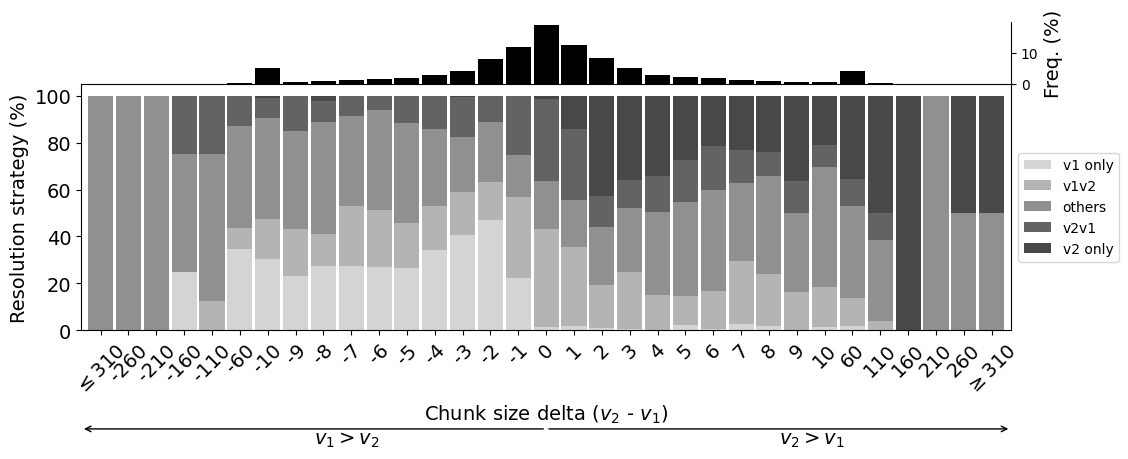

In [88]:
plt.style.use('tableau-colorblind10')
nrow = 2
ncol = 1
colors = ['#D4D4D4', '#B4B4B4', '#909090', '#636363', '#494848']
fig = plt.figure(figsize=(12,4)) 
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, height_ratios = [1, 4]) 

ax= plt.subplot(gs[0,0])
df_percentages.plot(kind='bar', x='delta', width=0.9, ax=ax, legend=False, color='black')
ax.set_xticks([])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("Freq. (%)", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax= plt.subplot(gs[1,0])
df_plot.plot(kind='bar', x='delta', width=0.9, stacked=True, ax = ax, color=colors)
ax.set_ylabel("Resolution strategy (%)", fontsize=14)
ax.set_xlabel("Chunk size delta ($v_{2}$ - $v_{1}$)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

ax.annotate('', xy=(0, -0.4), xycoords='axes fraction', xytext=(0.5,-0.4), 
            arrowprops=dict(arrowstyle="->"))
ax.annotate('$v_1 > v_2$', xy=(0, -0.46), xycoords='axes fraction', xytext=(0.25,-0.46), fontsize=14)

ax.annotate('', xy=(0.5, -0.4), xycoords='axes fraction', xytext=(1,-0.4), 
            arrowprops=dict(arrowstyle="<-"))
ax.annotate('$v_2 > v_1$', xy=(0, -0.46), xycoords='axes fraction', xytext=(0.75,-0.46), fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
labels = ax.get_xticklabels()
labels[0] = '$\leq310$'
labels[-1] = '$\geq310$'
ax.set_xticklabels(labels, rotation=45)
plt.show()
fig.savefig('figures/resolution_composition.png', dpi=300, bbox_inches = "tight")

In [89]:
df[(df['chunk_size_delta']>-60) & (df['chunk_size_delta']<=-10)]

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
38,777577,0.87,0.48,0.69,0.31,0.35,(v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2...,4,4,12.90,25.00,31,16,-15.0,True,47,31
42,777507,0.96,0.04,0.96,0.04,0.00,v1 v2 v1,10,0,31.25,0.00,32,1,-31.0,True,35,24
93,777967,0.94,0.06,0.94,0.06,0.00,v2 v1,0,1,0.00,50.00,16,2,-14.0,True,18,17
147,778801,0.89,0.22,0.83,0.17,0.11,(v1_2) v1 (v1_2) v1 v2,0,0,0.00,0.00,30,6,-24.0,False,41,40
220,780444,0.60,0.40,0.60,0.40,0.00,v2 v1,13,0,68.42,0.00,19,4,-15.0,True,28,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,1603238,0.96,0.17,0.90,0.10,0.12,v2 v1 (v1_2) v1 (v1_2) v1,6,1,20.69,20.00,29,5,-24.0,True,36,26
13351,1603180,1.00,0.00,1.00,0.00,0.00,v1,4,0,40.00,0.00,10,0,-10.0,True,12,9
13376,1610034,1.00,0.96,0.52,0.48,0.95,(v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2...,1,3,0.48,1.52,207,197,-10.0,True,458,236
13380,1610058,0.64,0.94,0.35,0.65,0.57,(v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2...,33,0,52.38,0.00,63,43,-20.0,True,117,52


In [90]:
df[(df['chunk_size_delta']>10) & (df['chunk_size_delta']<=60)]

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
10,776948,0.74,0.87,0.43,0.57,0.61,v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v1_2) v1 (v...,0,1,0.00,3.85,13,26,13.0,True,45,44
16,777089,0.43,0.63,0.40,0.60,0.06,v1 (v1_2) v1 v2,0,5,0.00,13.89,19,36,17.0,True,77,70
26,777309,0.00,1.00,0.00,1.00,0.00,v2,0,2,0.00,9.52,0,21,21.0,True,21,19
32,777352,0.83,0.67,0.58,0.42,0.50,(v1_2) v1 (v1_2) v1 v2,0,15,0.00,78.95,5,19,14.0,True,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,1610180,0.00,1.00,0.00,1.00,0.00,v2,1,40,100.00,95.24,1,42,41.0,True,47,2
13408,1610777,0.97,0.87,0.55,0.45,0.84,v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v1 (v...,0,26,0.00,46.43,33,56,23.0,True,95,42
13409,1610808,0.97,0.87,0.55,0.45,0.84,v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v1 (v...,3,23,8.33,43.40,36,53,17.0,True,96,42
13420,1610286,0.07,0.96,0.06,0.94,0.04,(v1_2) v1 v2,0,6,0.00,18.75,2,32,30.0,True,35,28


In [91]:
df_plot[df_plot['delta']==0]

,delta,v1 only,v1v2,others,v2v1,v2 only
16,0,1.611227,41.528067,20.322245,35.18711,1.351351


### Distance from v1 or v2

On average, from the chunks that were resolved using only v1 or v2 lines, how far are they from the complete v1 or v2 solution?

In [25]:
v1_only.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.367000e+03,1367.0,1367.0,1367.0,1367.0,1367.0,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,1.087681e+06,1.0,0.0,1.0,0.0,0.0,3.168252,1.059985,49.862151,44.989027,6.060717,1.059985,-5.000732,8.003658,3.298464
std,2.011784e+05,0.0,0.0,0.0,0.0,0.0,7.108926,2.887734,19.275360,49.766474,9.882396,2.887734,10.272673,11.633841,6.215636
min,7.769150e+05,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-161.000000,2.000000,1.000000
25%,9.457500e+05,1.0,0.0,1.0,0.0,0.0,1.000000,0.000000,33.330000,0.000000,2.000000,0.000000,-5.000000,3.000000,1.000000
50%,1.045144e+06,1.0,0.0,1.0,0.0,0.0,1.000000,0.000000,50.000000,0.000000,3.000000,0.000000,-2.000000,4.000000,1.000000
75%,1.183976e+06,1.0,0.0,1.0,0.0,0.0,2.000000,1.000000,60.000000,100.000000,5.000000,1.000000,-1.000000,8.000000,3.000000
max,1.652304e+06,1.0,0.0,1.0,0.0,0.0,157.000000,41.000000,98.330000,100.000000,161.000000,41.000000,39.000000,164.000000,87.000000


For chunks that were resolved using only some lines of v1, they miss, on average, 3.17 or 49.9% of V1 lines. Interestingly, the average size of V2 in these chunks is 1 (min 0, max 41).

In [26]:
v2_only.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.260000e+03,1260.0,1260.000000,1260.0,1260.000000,1260.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,1.086808e+06,0.0,0.999921,0.0,0.999921,0.0,0.775397,4.414286,38.253968,52.304365,0.775397,7.679365,6.903968,9.453968,3.721429
std,1.953527e+05,0.0,0.002817,0.0,0.002817,0.0,2.157323,16.840978,48.620025,20.535191,2.157323,20.598211,20.708794,22.259826,10.763957
min,7.770420e+05,0.0,0.900000,0.0,0.900000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-25.000000,2.000000,1.000000
25%,9.472388e+05,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,42.860000,0.000000,2.000000,2.000000,3.000000,1.000000
50%,1.069216e+06,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,50.000000,0.000000,3.000000,3.000000,4.000000,1.000000
75%,1.161443e+06,0.0,1.000000,0.0,1.000000,0.0,1.000000,3.000000,100.000000,66.670000,1.000000,6.000000,6.000000,9.000000,3.000000
max,1.611177e+06,0.0,1.000000,0.0,1.000000,0.0,34.000000,478.000000,100.000000,99.170000,34.000000,484.000000,484.000000,489.000000,305.000000


For chunks that were resolved using only some lines of v2, they miss, on average, 4.41 or 52.3% of V2 lines. Interestingly, as happened with v1_only, the average size of V1 in these chunks is 0.77 (min 0, max 34).

### Sample of v1_only chunks

In [27]:
sample_v1 = v1_only.sample(3, random_state = 42)
sample_v1.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
4193,975625,1.0,0.0,1.0,0.0,0.0,v1,1,0,50.00,0.0,2,0,-2.0,True,2,1
10299,1300416,1.0,0.0,1.0,0.0,0.0,v1,6,4,54.55,100.0,11,4,-7.0,True,18,7
5815,1040848,1.0,0.0,1.0,0.0,0.0,v1,1,1,50.00,100.0,2,1,-1.0,True,3,1


### Chunk 1

In [28]:
chunk1 = Chunk(int(sample_v1.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

import org.hibernate.cache.RegionFactory;
import org.hibernate.cache.impl.NoCachingRegionFactory;
import org.hibernate.cache.impl.bridge.RegionFactoryCacheProviderBridge;
<<<<<<<
import org.hibernate.engine.jdbc.JdbcSupport;
import org.hibernate.engine.jdbc.batch.internal.BatchBuilder;
>>>>>>>
import org.hibernate.engine.jdbc.spi.ExtractedDatabaseMetaData;
import org.hibernate.engine.jdbc.spi.JdbcServices;
import org.hibernate.engine.transaction.spi.TransactionFactory;




In [29]:
print(chunk1.resolution)

import org.hibernate.cache.RegionFactory;
import org.hibernate.cache.impl.NoCachingRegionFactory;
import org.hibernate.cache.impl.bridge.RegionFactoryCacheProviderBridge;
import org.hibernate.engine.jdbc.JdbcSupport;
import org.hibernate.engine.jdbc.spi.ExtractedDatabaseMetaData;
import org.hibernate.engine.jdbc.spi.JdbcServices;
import org.hibernate.engine.transaction.spi.TransactionFactory;



In [30]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk1.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importorg.hibernate.engine.jdbc.batch.internal.BatchBuilder;


### Chunk 2

In [28]:
chunk2 = Chunk(int(sample_v1.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

NameError: name 'sample_v1' is not defined

In [25]:
print(chunk2.resolution)


			if (pfReqId != null) rque.addPerfRequestId(pfReqId);

			final List<Throwable> errs = new LinkedList<Throwable>();
			final ExecutionCtrl execCtrl = (ExecutionCtrl)exec;
			//Process all; ignore getMaxProcessTime();
			//we cannot handle them partially since UUID might be recycled
			for (AuRequest request; (request = rque.nextRequest()) != null;) {



### Chunk 3

In [26]:
chunk3 = Chunk(int(sample_v1.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())


    public WikiPageWrapper(Contest contest, Long loggedInUserId) throws SystemException, UnsupportedEncodingException, PortalException {
        this.contest = contest;
<<<<<<<
        String contestTitle = contest.getContestUrlName()+ "-" + contest.getContestYear();
        this.contestTitle = removeSpecialChars(contestTitle);
        String contestTitle = contest.getContestShortName();
        this.contestTitle = WikiUtil.removeSpecialChars(contestTitle);
>>>>>>>
        this.loggedInUserId = loggedInUserId;
        initWikiPageResourceAndCreateIfNoneExistsForThisContest();
        initWikiPageAndCreateIfNoneExistsForThisContest();




In [27]:
print(chunk3.resolution)


    public WikiPageWrapper(Contest contest, Long loggedInUserId) throws SystemException, UnsupportedEncodingException, PortalException {
        this.contest = contest;
        String contestTitle = contest.getContestUrlName()+ "-" + contest.getContestYear();
        this.contestTitle = WikiUtil.removeSpecialChars(contestTitle);
        this.loggedInUserId = loggedInUserId;
        initWikiPageResourceAndCreateIfNoneExistsForThisContest();
        initWikiPageAndCreateIfNoneExistsForThisContest();



In [36]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk3.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importcom.qcadoo.view.api.ViewDefinition;


### Sample of v2_only chunks

In [37]:
sample_v2 = v2_only.sample(3, random_state = 42)
sample_v2.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
734,794736,0.0,1.0,0.0,1.0,0.0,v2,1,1,100.0,50.00,1,2,1.0,True,3,1
10360,1301843,0.0,1.0,0.0,1.0,0.0,v2,0,15,0.0,93.75,0,16,16.0,True,17,1
381,784355,0.0,1.0,0.0,1.0,0.0,v2,1,1,100.0,50.00,1,2,1.0,True,4,1


### Chunk 1

In [38]:
chunk1 = Chunk(int(sample_v2.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())


import hudson.Extension;
import hudson.FilePath;
<<<<<<<
import hudson.FilePath.FileCallable;
import jenkins.MasterToSlaveFileCallable;
import hudson.Functions;
>>>>>>>
import hudson.model.Computer;
import hudson.model.Node;
import hudson.remoting.Callable;




In [39]:
print(chunk1.resolution)


import hudson.Extension;
import hudson.FilePath;
import jenkins.MasterToSlaveFileCallable;
import hudson.model.Computer;
import hudson.model.Node;
import hudson.remoting.Callable;



In [40]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk1.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importhudson.Functions;


### Chunk 2

In [41]:
chunk2 = Chunk(int(sample_v2.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

    private static final String TYPE_PARAMETER = "type";
    private static final String VALUE_PARAMETER = "value";
    private static final String MODULE_PARAMETER = "module";
<<<<<<<
    private static final String STACKTRACE_PARAMETER = "stacktrace";
    private static final String DEFAULT_PACKAGE_NAME = "(default)";
    private final InterfaceBinding<StackTraceInterface> stackTraceInterfaceBinding;

    /**
     * Creates a Binding system to send a {@link ExceptionInterface} on JSON stream.
     * <p>
     * Exceptions may contain StackTraces, this means that the system should also be able to send a
     * {@link StackTraceInterface} on the JSON stream.
     * </p>
     *
     * @param stackTraceInterfaceBinding InterfaceBinding allowing to send a {@link StackTraceInterface} on the JSON
     *                                   stream.
     */
    public ExceptionInterfaceBinding(InterfaceBinding<StackTraceInterface> stackTraceInterfaceBinding) {
        this.stackTraceInterfaceBind

In [42]:
print(chunk2.resolution)

    private static final String TYPE_PARAMETER = "type";
    private static final String VALUE_PARAMETER = "value";
    private static final String MODULE_PARAMETER = "module";
    private static final String DEFAULT_PACKAGE_NAME = "(default)";

    @Override
    public void writeInterface(JsonGenerator generator, ExceptionInterface exceptionInterface) throws IOException {



In [43]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk2.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

privatestaticfinalStringSTACKTRACE_PARAMETER="stacktrace";
privatefinalInterfaceBinding<StackTraceInterface>stackTraceInterfaceBinding;
/**
*CreatesaBindingsystemtosenda{@linkExceptionInterface}onJSONstream.
*<p>
*ExceptionsmaycontainStackTraces,thismeansthatthesystemshouldalsobeabletosenda
*{@linkStackTraceInterface}ontheJSONstream.
*</p>
*
*@paramstackTraceInterfaceBindingInterfaceBindingallowingtosenda{@linkStackTraceInterface}ontheJSON
*stream.
*/
publicExceptionInterfaceBinding(InterfaceBinding<StackTraceInterface>stackTraceInterfaceBinding){
this.stackTraceInterfaceBinding=stackTraceInterfaceBinding;
}


### Chunk 3

In [44]:
chunk3 = Chunk(int(sample_v2.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

        this.parameterConverter = parameterConverter;
    }

<<<<<<<
    public void execute() throws Exception {
    public void execute() {
        Clock buildTimeClock = new Clock();

>>>>>>>
        StartParameter startParameter = null;

        try {




In [45]:
print(chunk3.resolution)

        this.parameterConverter = parameterConverter;
    }

    public void execute() {
        StartParameter startParameter = null;

        try {



In [46]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk3.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

ClockbuildTimeClock=newClock();


## Correlation analysis between v2_percentage and chunk_size_delta

In [47]:
df_analysis = df[['chunk_size','v2_percentage', 'v1_percentage', 'v1_size', 'v2_size', 'chunk_size_delta']]
df_analysis.describe()

,chunk_size,v2_percentage,v1_percentage,v1_size,v2_size,chunk_size_delta
count,10177.000000,10177.000000,10177.00000,10177.00000,10177.000000,10177.000000
mean,15.298418,0.533306,0.55345,6.79493,6.965216,0.170286
std,68.754593,0.320762,0.31901,30.51060,33.251309,20.674248
min,2.000000,0.000000,0.00000,0.00000,0.000000,-388.000000
25%,4.000000,0.330000,0.33000,2.00000,2.000000,-2.000000
50%,6.000000,0.500000,0.50000,2.00000,3.000000,0.000000
75%,12.000000,0.800000,0.81000,5.00000,5.000000,2.000000
max,2922.000000,1.000000,1.00000,1352.00000,1402.000000,1401.000000


In [48]:
# remove outliers
from scipy import stats
df_analysis = df_analysis[(np.abs(stats.zscore(df_analysis)) < 3).all(axis=1)]
df_analysis.describe()

,chunk_size,v2_percentage,v1_percentage,v1_size,v2_size,chunk_size_delta
count,10066.000000,10066.000000,10066.000000,10066.000000,10066.000000,10066.000000
mean,10.885754,0.531909,0.551234,4.891119,4.996523,0.105404
std,14.942229,0.319393,0.317730,7.548437,7.659604,7.798258
min,2.000000,0.000000,0.000000,0.000000,0.000000,-61.000000
25%,4.000000,0.330000,0.330000,2.000000,2.000000,-2.000000
50%,6.000000,0.500000,0.500000,2.000000,3.000000,0.000000
75%,12.000000,0.800000,0.800000,5.000000,5.000000,2.000000
max,220.000000,1.000000,1.000000,96.000000,104.000000,62.000000


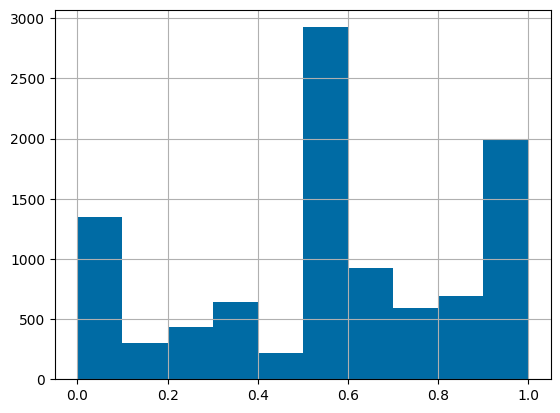

In [49]:
df_analysis['v1_percentage'].hist()
plt.show()

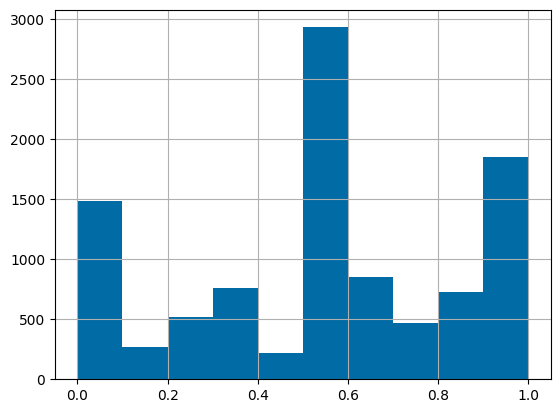

In [50]:
df_analysis['v2_percentage'].hist()
plt.show()

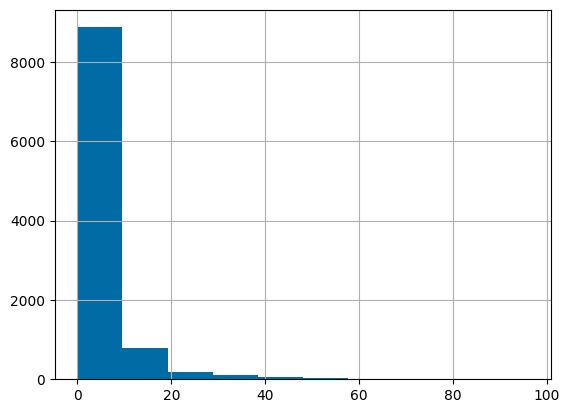

In [51]:
df_analysis['v1_size'].hist()
plt.show()

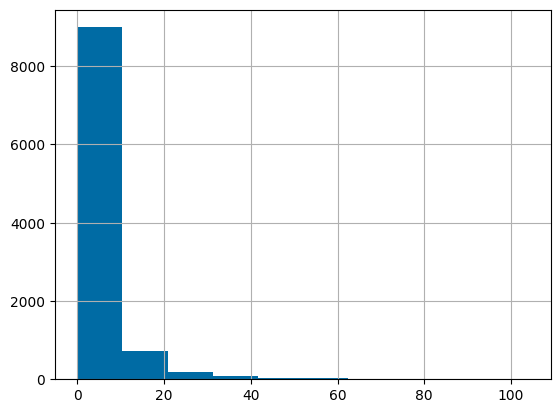

In [52]:
df_analysis['v2_size'].hist()
plt.show()

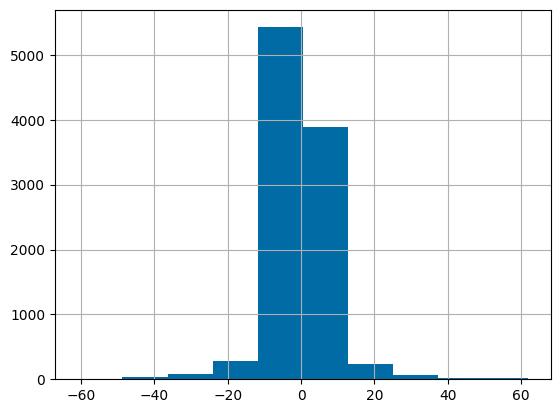

In [53]:
df_analysis['chunk_size_delta'].hist()
plt.show()

In [54]:
# normality tests
from scipy.stats import kstest
print(kstest(df_analysis['v1_percentage'], 'norm'))
print(kstest(df_analysis['v2_percentage'], 'norm'))
print(kstest(df_analysis['v1_size'], 'norm'))
print(kstest(df_analysis['v2_size'], 'norm'))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.7651476469229042, pvalue=0.0)
KstestResult(statistic=0.7771703925898696, pvalue=0.0)


In [55]:
# normality tests
from scipy.stats import kstest
kstest(df_analysis['chunk_size_delta'], 'norm')

KstestResult(statistic=0.2701169453417075, pvalue=0.0)

Since the distrbutions are not normal, we use Spearman correlation

In [56]:
df_analysis[['v1_percentage','v2_percentage', 'v1_size', 'v2_size', 'chunk_size_delta']].corr('spearman')

,v1_percentage,v2_percentage,v1_size,v2_size,chunk_size_delta
v1_percentage,1.000000,-0.800149,0.611264,-0.338467,-0.666364
v2_percentage,-0.800149,1.000000,-0.349092,0.593547,0.674516
v1_size,0.611264,-0.349092,1.000000,0.148843,-0.565029
v2_size,-0.338467,0.593547,0.148843,1.000000,0.591914
chunk_size_delta,-0.666364,0.674516,-0.565029,0.591914,1.000000


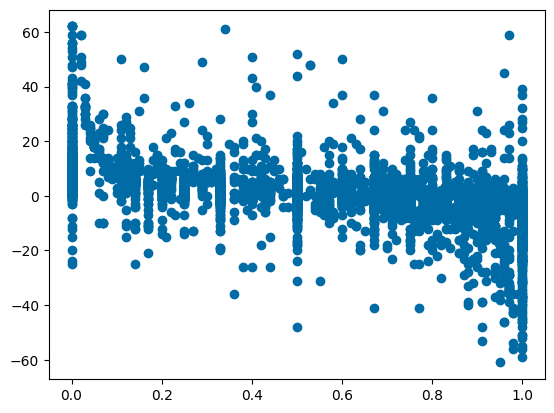

In [57]:
plt.scatter(df_analysis['v1_percentage'], df_analysis['chunk_size_delta'])
plt.show()

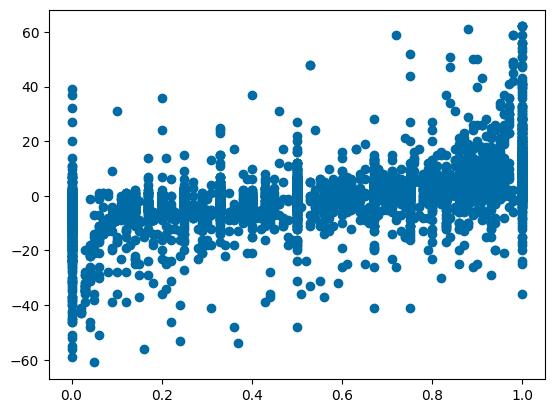

In [58]:
plt.scatter(df_analysis['v2_percentage'], df_analysis['chunk_size_delta'])
plt.show()

### Analysis of cases where v1_percentage and v2_percentage are 50%

In [17]:
half_half = df[(df['normalized_v1_percentage'] == 0.5) & (df['normalized_v2_percentage'] == 0.5)]
half_half

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
6,776918,0.50,0.50,0.5,0.5,0.00,v1 v2,1,1,50.00,50.0,2,2,0.0,True,4,2
7,776929,0.50,0.50,0.5,0.5,0.00,v1 v2,0,1,0.00,50.0,1,2,1.0,True,3,2
11,776951,0.50,0.50,0.5,0.5,0.00,v1 v2,1,0,50.00,0.0,2,1,-1.0,True,3,2
18,777222,0.50,0.50,0.5,0.5,0.00,v1 v2,1,0,50.00,0.0,2,1,-1.0,True,5,3
21,777218,0.50,0.50,0.5,0.5,0.00,v1 v2,1,1,50.00,50.0,2,2,0.0,True,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.5,0.5,0.00,v1 v2,0,1,0.00,50.0,1,2,1.0,True,3,2
13433,1652325,0.50,0.50,0.5,0.5,0.00,v2 v1,1,1,50.00,50.0,2,2,0.0,True,4,2
13566,1658634,0.71,0.71,0.5,0.5,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.0,7,5,-2.0,True,13,7
13567,1658665,0.50,0.50,0.5,0.5,0.00,v2 v1,1,1,50.00,50.0,2,2,0.0,True,4,3


In [18]:
half_half.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.878000e+03,2878.000000,2878.000000,2878.0,2878.0,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000,2878.000000
mean,1.101092e+06,0.530709,0.530709,0.5,0.5,0.061025,1.125782,1.250521,35.999600,39.857509,3.563933,3.698402,0.134468,7.930160,3.989229
std,2.230793e+05,0.093228,0.093229,0.0,0.0,0.185976,2.325784,2.382328,24.674807,23.193747,24.914018,25.415533,3.442308,58.225142,29.375747
min,7.769180e+05,0.500000,0.500000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-48.000000,3.000000,1.000000
25%,9.365415e+05,0.500000,0.500000,0.5,0.5,0.000000,0.000000,1.000000,0.000000,33.330000,2.000000,2.000000,-1.000000,3.000000,2.000000
50%,1.064893e+06,0.500000,0.500000,0.5,0.5,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,0.000000,4.000000,2.000000
75%,1.297340e+06,0.500000,0.500000,0.5,0.5,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,1.000000,5.000000,3.000000
max,1.658666e+06,1.000000,1.000000,0.5,0.5,1.000000,49.000000,62.000000,98.000000,95.450000,871.000000,848.000000,76.000000,1956.000000,968.000000


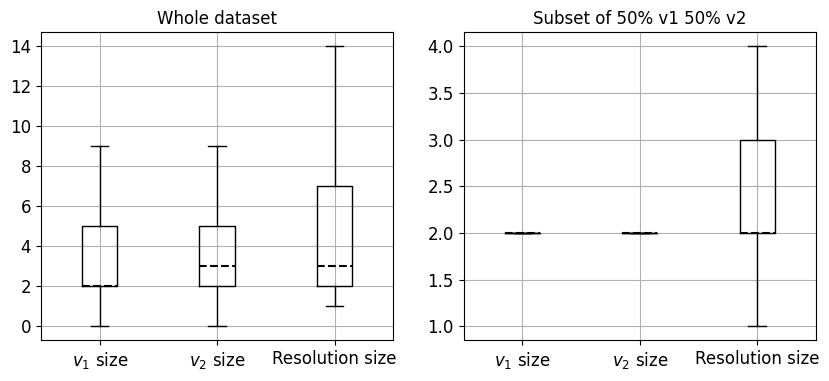

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['v1_size', 'v2_size', 'resolution_size'], showfliers=False, ax=ax[0], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
half_half.boxplot(['v1_size', 'v2_size', 'resolution_size'], showfliers=False, ax=ax[1], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].set_xticklabels(['$v_{1}$ size', '$v_{2}$ size','Resolution size'])
ax[0].set_title("Whole dataset")

ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[1].set_xticklabels(['$v_{1}$ size', '$v_{2}$ size','Resolution size'])
ax[1].set_title("Subset of 50% v1 50% v2")
plt.show()

In [20]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', half_half)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', half_half)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', half_half)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', half_half)
v1v2v1 = analysis_util.get_chunk_composition_pattern_data('v1 v2 v1', half_half)
v2v1v2 = analysis_util.get_chunk_composition_pattern_data('v2 v1 v2', half_half)
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(half_half)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(half_half)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(half_half)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(half_half)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(half_half)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(half_half) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(half_half)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(half_half)*100):.2f}%)')

Only v1 lines: 0 (0.00%)
Only v2 lines: 0 (0.00%)
No alternation (v1v2): 1371 (47.64%)
No alternation (v2v1): 1099 (38.19%)
Some alternation (v1v2v1 or v2v1v2): 33 (1.15%)
-------------
Easier cases (all above): 2503 (86.97%)
Remaining (harder cases): 375 (13.03%)


### Sample of half_half chunks

In [35]:
sample_half_half = half_half.sample(10, random_state = 42)
sample_half_half.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
2030,841932,0.50,0.50,0.5,0.5,0.00,v2 v1,0,2,0.0,40.0,3,5,2.0,True,9,7
6582,1069259,0.50,0.50,0.5,0.5,0.00,v1 v2,0,1,0.0,50.0,1,2,1.0,True,3,2
11247,1374423,0.50,0.50,0.5,0.5,0.00,v1 v2,1,1,50.0,50.0,2,2,0.0,True,4,2
7214,1098841,0.50,0.50,0.5,0.5,0.00,v1 v2,0,1,0.0,50.0,1,2,1.0,True,3,2
4662,984686,0.67,0.67,0.5,0.5,0.33,v1 v2 (v1_2),0,0,0.0,0.0,2,2,0.0,True,6,4


### Chunk 1

In [29]:
chunk1 = Chunk(int(sample_half_half.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

        return true;
    }

<<<<<<<
    @Override
    protected boolean isApnTypeActive(String type) {
        // TODO: support simultaneous with List instead
    private boolean getDataRoaming() {
        return mGsmPhone.mSST.getDataRoaming();
    }

    private boolean isApnTypeActive(String type) {
        // TODO: to support simultaneous, mActiveApn can be a List instead.
>>>>>>>
        return mActiveApn != null && mActiveApn.canHandleType(type);
    }





In [30]:
print(chunk1.resolution)

        return true;
    }

    private boolean getDataRoaming() {
        return mGsmPhone.mSST.getDataRoaming();
    }

    @Override
    protected boolean isApnTypeActive(String type) {
        // TODO: support simultaneous with List instead
        return mActiveApn != null && mActiveApn.canHandleType(type);
    }




### Chunk 2

In [31]:
chunk2 = Chunk(int(sample_half_half.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())


			if (pfReqId != null) rque.addPerfRequestId(pfReqId);

<<<<<<<
			final List<Throwable> errs = new LinkedList<Throwable>();
			final List errs = new LinkedList();
			final ExecutionCtrl execCtrl = (ExecutionCtrl)exec;
>>>>>>>
			//Process all; ignore getMaxProcessTime();
			//we cannot handle them partially since UUID might be recycled
			for (AuRequest request; (request = rque.nextRequest()) != null;) {




In [32]:
print(chunk2.resolution)


			if (pfReqId != null) rque.addPerfRequestId(pfReqId);

			final List<Throwable> errs = new LinkedList<Throwable>();
			final ExecutionCtrl execCtrl = (ExecutionCtrl)exec;
			//Process all; ignore getMaxProcessTime();
			//we cannot handle them partially since UUID might be recycled
			for (AuRequest request; (request = rque.nextRequest()) != null;) {



### Chunk 3

In [33]:
chunk3 = Chunk(int(sample_half_half.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())


    public WikiPageWrapper(Contest contest, Long loggedInUserId) throws SystemException, UnsupportedEncodingException, PortalException {
        this.contest = contest;
<<<<<<<
        String contestTitle = contest.getContestUrlName()+ "-" + contest.getContestYear();
        this.contestTitle = removeSpecialChars(contestTitle);
        String contestTitle = contest.getContestShortName();
        this.contestTitle = WikiUtil.removeSpecialChars(contestTitle);
>>>>>>>
        this.loggedInUserId = loggedInUserId;
        initWikiPageResourceAndCreateIfNoneExistsForThisContest();
        initWikiPageAndCreateIfNoneExistsForThisContest();




In [34]:
print(chunk3.resolution)


    public WikiPageWrapper(Contest contest, Long loggedInUserId) throws SystemException, UnsupportedEncodingException, PortalException {
        this.contest = contest;
        String contestTitle = contest.getContestUrlName()+ "-" + contest.getContestYear();
        this.contestTitle = WikiUtil.removeSpecialChars(contestTitle);
        this.loggedInUserId = loggedInUserId;
        initWikiPageResourceAndCreateIfNoneExistsForThisContest();
        initWikiPageAndCreateIfNoneExistsForThisContest();



### Chunk 4

In [36]:
chunk4 = Chunk(int(sample_half_half.iloc[3]['chunk_id']))
print(chunk4.get_conflict_text())

    private Path path;
    private RecDef.Elem elem;
    private RecDef.Attr attr;
<<<<<<<
    private OptList.Opt optRoot, optKey, optValue;
    private RecDef.Opt optRoot, optKey, optValue;
    private String defaultPrefix;
>>>>>>>
    private List<RecDefNode> children = new ArrayList<RecDefNode>();
    private SortedMap<Path, NodeMapping> nodeMappings = new TreeMap<Path, NodeMapping>();
    private Listener listener;




In [37]:
print(chunk4.resolution)

    private Path path;
    private RecDef.Elem elem;
    private RecDef.Attr attr;
    private OptList.Opt optRoot, optKey, optValue;
    private String defaultPrefix;
    private List<RecDefNode> children = new ArrayList<RecDefNode>();
    private SortedMap<Path, NodeMapping> nodeMappings = new TreeMap<Path, NodeMapping>();
    private Listener listener;



### Chunk 5

In [38]:
chunk5 = Chunk(int(sample_half_half.iloc[4]['chunk_id']))
print(chunk5.get_conflict_text())

		this.cidrAddress = cidrAddress;
		this.cidrSize = cidrSize;
		this.description = description;
<<<<<<<
		this.allocationState = Grouping.AllocationState.Enabled;
	}
	
		this.externalDhcp = false;
	}

>>>>>>>
	/*
	 * public HostPodVO(String name, long dcId) { this(null, name, dcId); }
	 */




In [39]:
print(chunk5.resolution)

		this.cidrAddress = cidrAddress;
		this.cidrSize = cidrSize;
		this.description = description;
		this.allocationState = Grouping.AllocationState.Enabled;
		this.externalDhcp = false;
	}

	/*
	 * public HostPodVO(String name, long dcId) { this(null, name, dcId); }
	 */

